In [87]:
from pathlib import Path
import matplotlib.pyplot as plt

In [88]:
import sys
sys.path.insert(0, "../benchmark_linalg/")
import benchmark

In [89]:
#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
linestyles = ['-', '--', ':', '-.']

def map_plot_style(styles, style_map, key):
    return style_map.setdefault(key, styles[len(style_map) % len(styles)])


In [90]:
benchmark.load_results("../run_linalg/nthreads_1/tensordot_npc_benchmark_s_10_l_2_mod_q_.txt")

(array([ 1.,  2.,  3.,  5.,  7., 10., 12., 15., 20., 25., 30., 35., 40.]),
 array([1.0199e-04, 1.8887e-04, 9.3824e-05, 9.7108e-05, 1.0591e-04,
        2.2089e-04, 3.4131e-04, 9.6582e-04, 2.7622e-03, 1.0991e-02,
        2.6844e-02, 6.1519e-02, 1.3309e-01]),
 {'mod_q': [],
  'legs': 2,
  'sectors': 10,
  'max_time': 0.1,
  'repeat_bestof': 3,
  'python_version': '3.12.4 | packaged by conda-forge | (main, Jun 17 2024, 10:23:07) [GCC 12.3.0]',
  'mod_name': 'tensordot_npc'})

In [96]:
data = []
for folder in Path('../run_linalg/').glob('nthreads_*'):
    nthreads = int(folder.name[len('nthreads_'):])
    
    for fn in folder.glob('*.txt'):
        sizes, results, kwargs = benchmark.load_results(fn)
        kwargs['nthreads'] = nthreads
        data.append((sizes, results, kwargs))
        

In [98]:
charge_label = {tuple([]): "No charge", tuple([1]): "U(1)"}

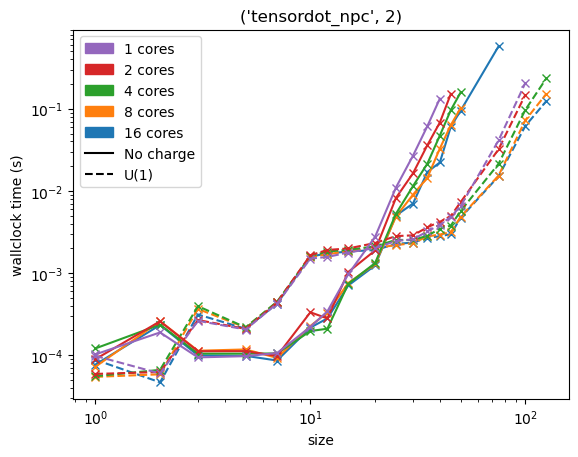

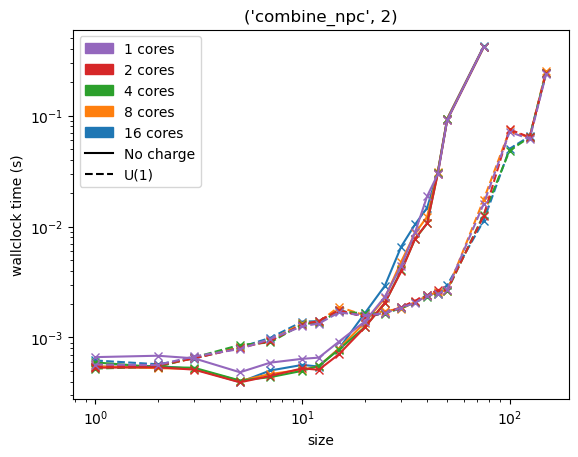

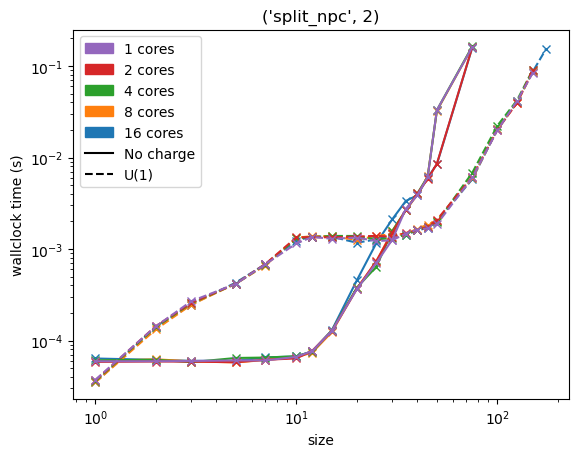

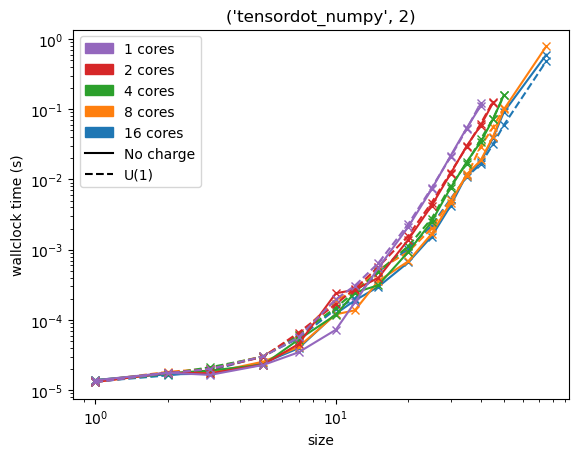

In [100]:

figs = {}
for sizes, results, kwargs in data:
    fig_key = (kwargs['mod_name'], kwargs['legs'])
    if fig_key not in figs:
        fig = plt.figure()
        ax = plt.gca()
        figs[fig_key] = (fig, {}, {})
    fig, color_map, linestyle_map = figs[fig_key]
    
    col = map_plot_style(colors, color_map, kwargs['nthreads'])
    ls = map_plot_style(linestyles, linestyle_map, tuple(kwargs['mod_q']))
    fig.axes[0].plot(sizes, results, color=col, linestyle=ls, marker='x')
    
for fn_key, (fig, color_map, linestyle_map) in figs.items():
    ax = fig.axes[0]
    ax.set_title(fn_key)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("size")
    ax.set_ylabel("wallclock time (s)")
    # add legend
    patches = []
    labels = []
    import matplotlib.patches as mpatches
    for key in sorted(color_map):
        patches.append(mpatches.Patch(color=color_map[key]))
        labels.append(f"{key} cores")
    import matplotlib.lines as mlines
    for key in sorted(linestyle_map):
        patches.append(mlines.Line2D([], [], linestyle=linestyle_map[key], color='k'))
        labels.append(charge_label[key])
    ax.legend(patches, labels)

plt.show()

